In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Problem: 50_Startups

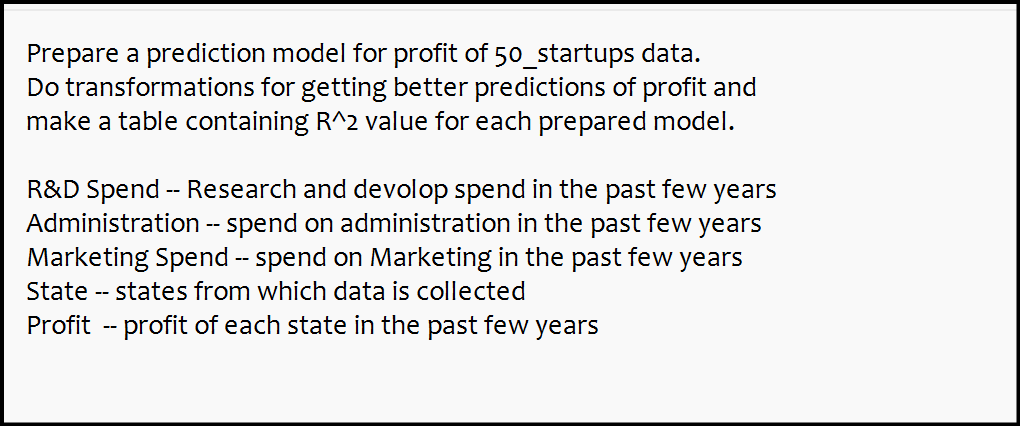

In [2]:
startup = pd.read_csv("50_Startups.csv")

In [3]:
startup.head() # data has 4 numerical and 5 categrical variables

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.shape # data has 50 rows and 5 columns

(50, 5)

In [5]:
startup.info() # no null values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup = startup.rename({'R&D Spend': 'RD_Spend',
                         'Marketing Spend': 'Marketing_Spend'}, axis=1)

In [7]:
startup.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup).fit()

In [9]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [10]:
model.tvalues , np.round(model.pvalues,5)

(Intercept           7.626218
 RD_Spend           17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64,
 Intercept          0.00000
 RD_Spend           0.00000
 Administration     0.60176
 Marketing_Spend    0.10472
 dtype: float64)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        07:13:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_RD_Spend=smf.ols('Profit~RD_Spend',data=startup).fit()
model_RD_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.50e-32
Time:                        07:13:13   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model_Administration=smf.ols('Profit~Administration',data=startup).fit()
model_Administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 20 Aug 2023   Prob (F-statistic):              0.162
Time:                        07:13:13   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model_Marketing_Spend=smf.ols('Profit~Marketing_Spend',data=startup).fit()
model_Marketing_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.38e-10
Time:                        07:13:13   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model_RDM=smf.ols('Profit~Marketing_Spend+RD_Spend',data=startup).fit()
model_RDM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           2.16e-31
Time:                        07:13:13   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# VIF calculation

rsq_RD_Spend = smf.ols('Profit~Administration+Marketing_Spend',data=startup).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_RD_Spend)

rsq_Admin = smf.ols('Profit~RD_Spend+Marketing_Spend',data=startup).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)

rsq_Market = smf.ols('Profit~Administration+RD_Spend',data=startup).fit().rsquared  
vif_Market = 1/(1-rsq_Market)

df = {'Variables':['RD_Spend','Admin','Market'],'VIF':[vif_RD_Spend,vif_Admin,vif_Market]}
Vif_frame = pd.DataFrame(df)
Vif_frame

## admin & market have high collinearity

,Variables,VIF
0,RD_Spend,2.562283
1,Admin,20.181758
2,Market,19.161838


## Residual Analysis

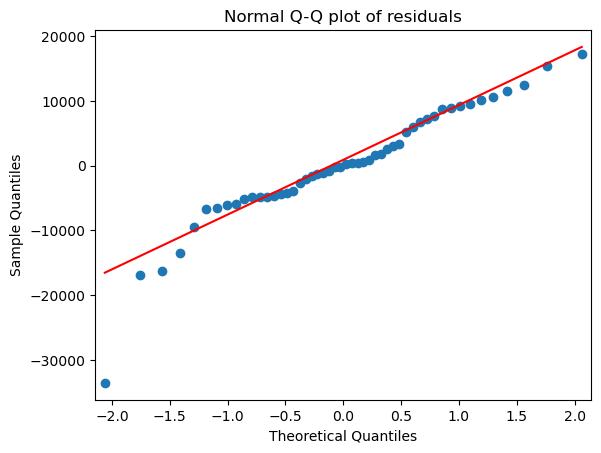

In [17]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

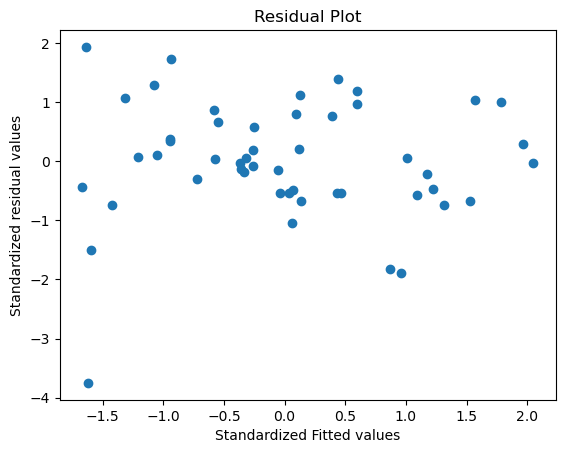

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


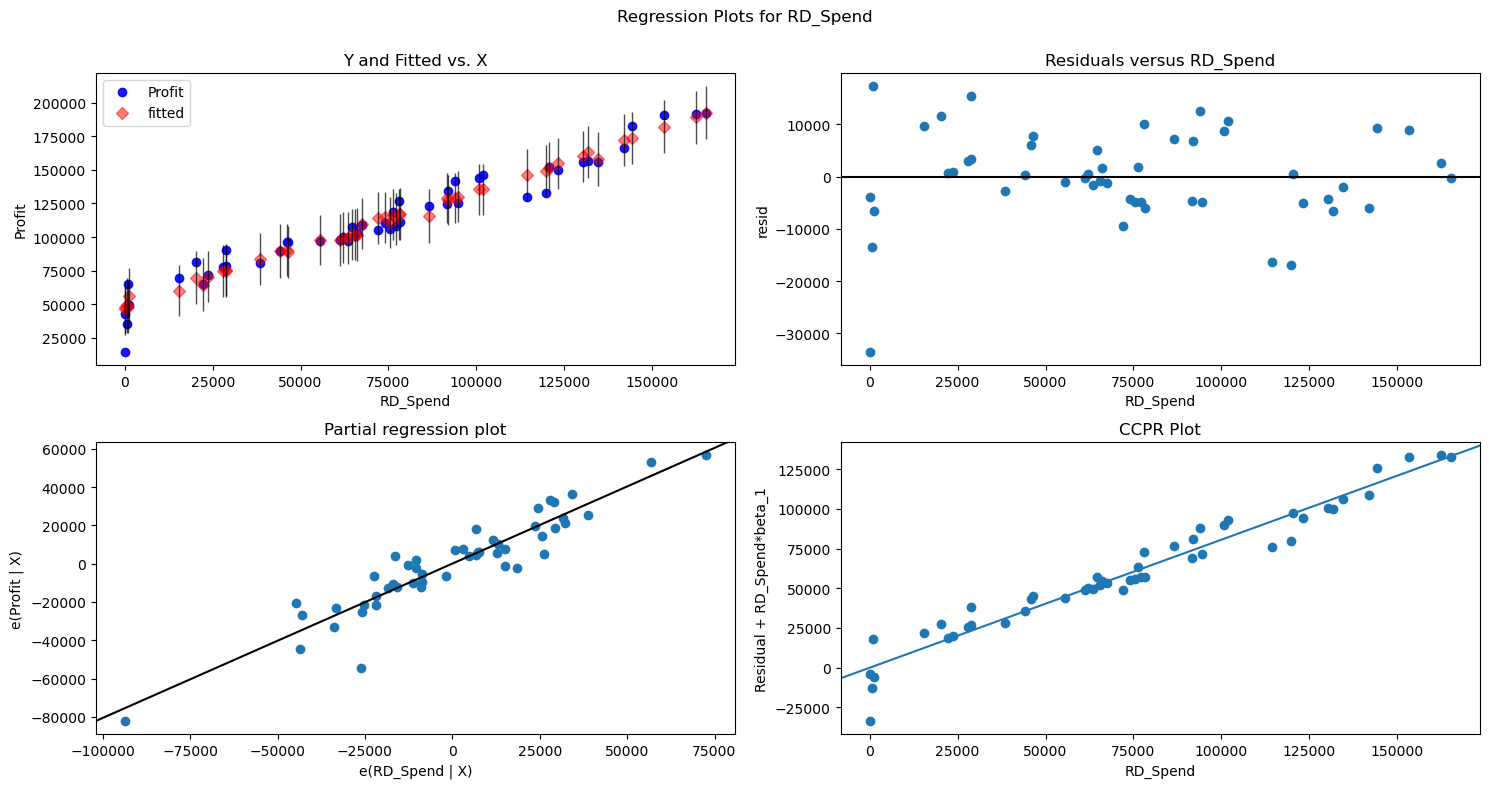

In [21]:
## Residual Vs Regressors

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

eval_env: 1


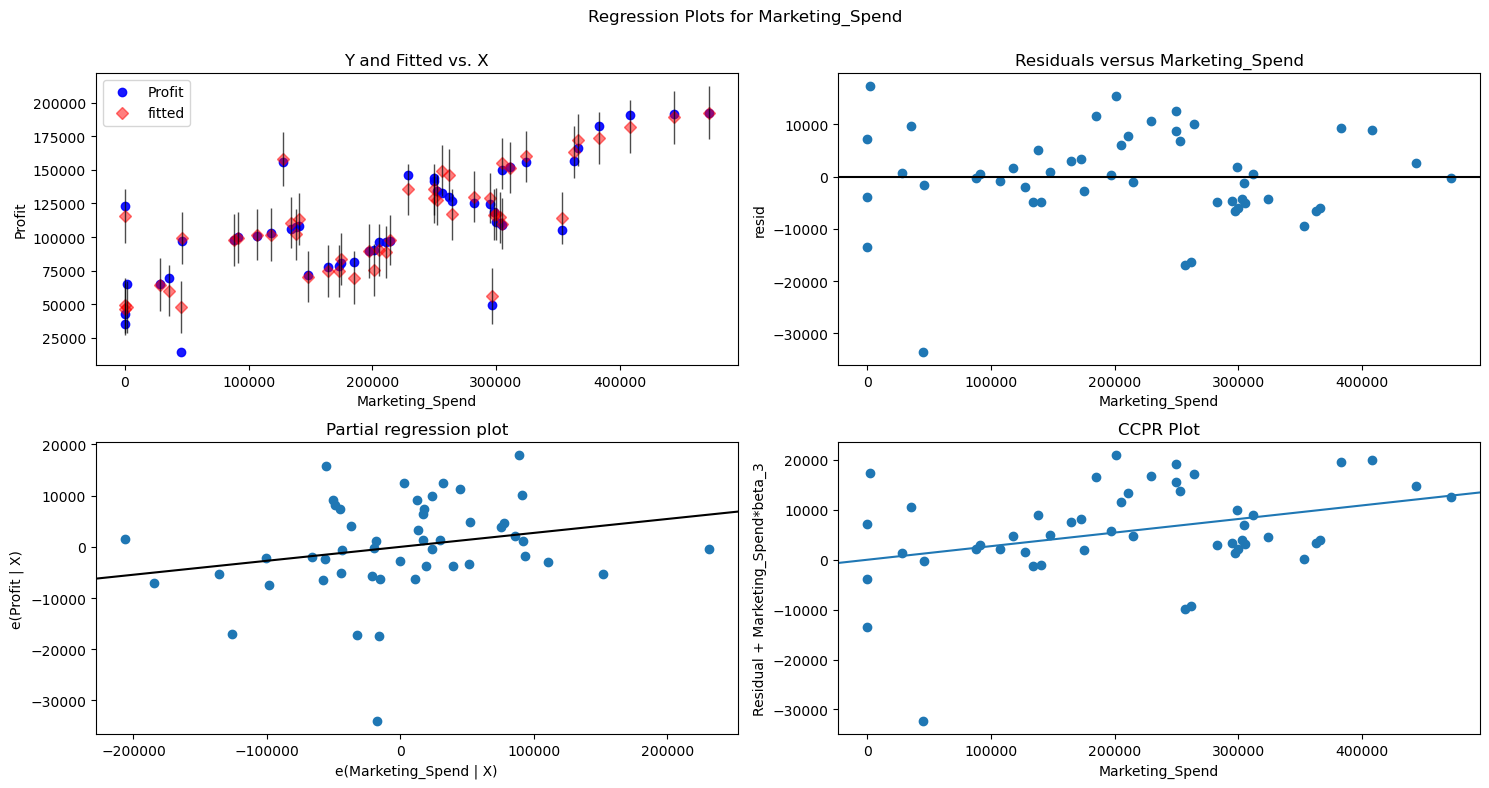

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

eval_env: 1


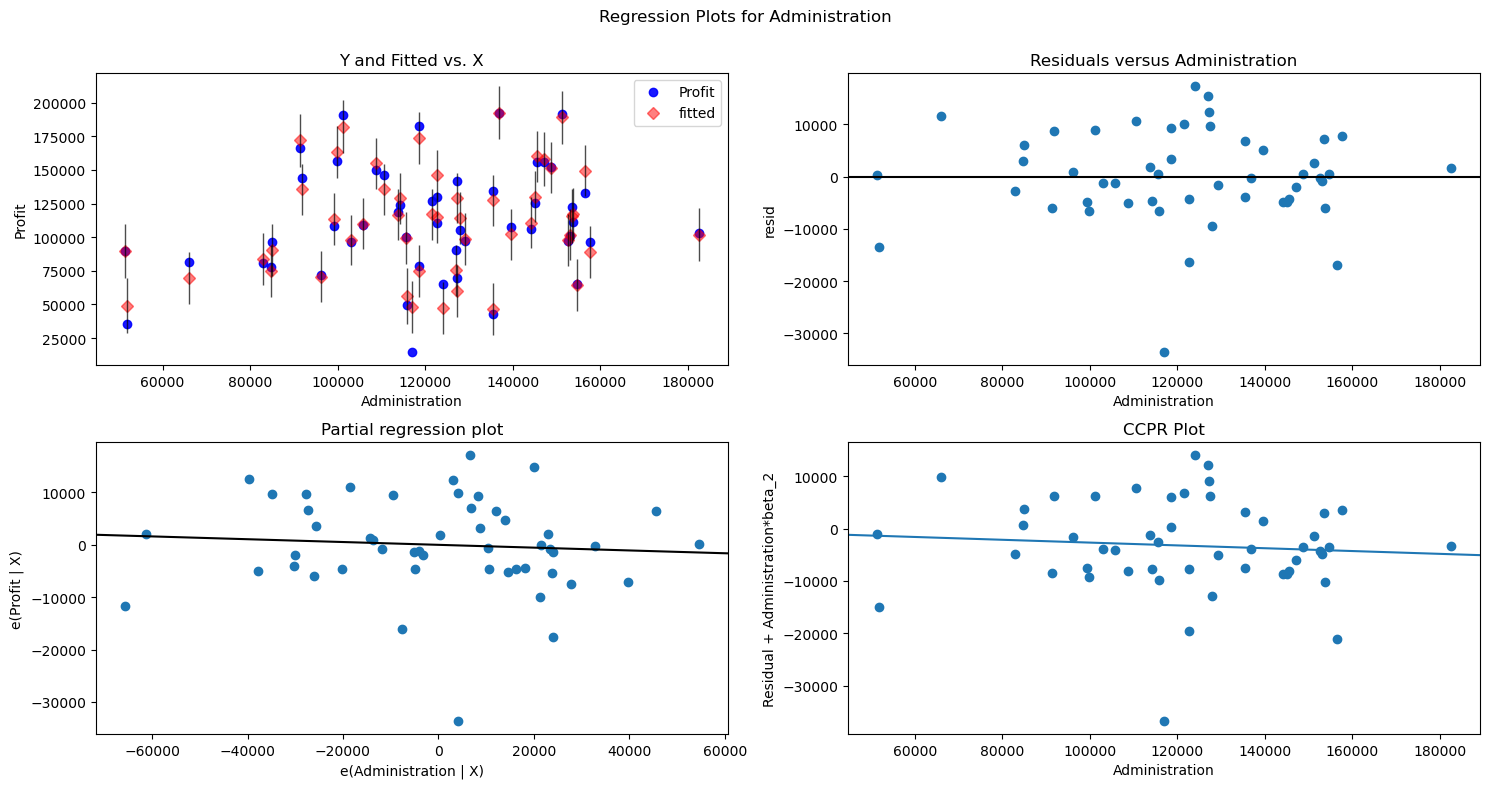

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

## Detecting Influencers/Outliers

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

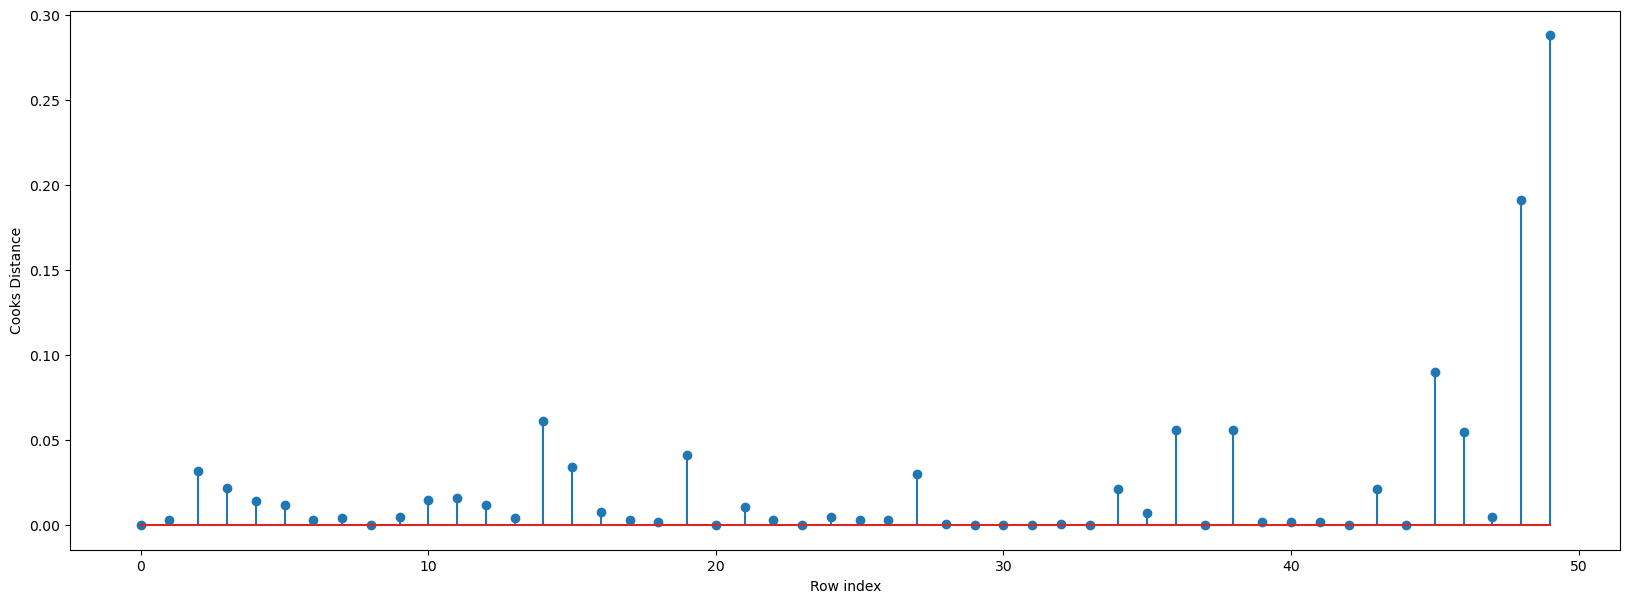

In [25]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

## High Influence points

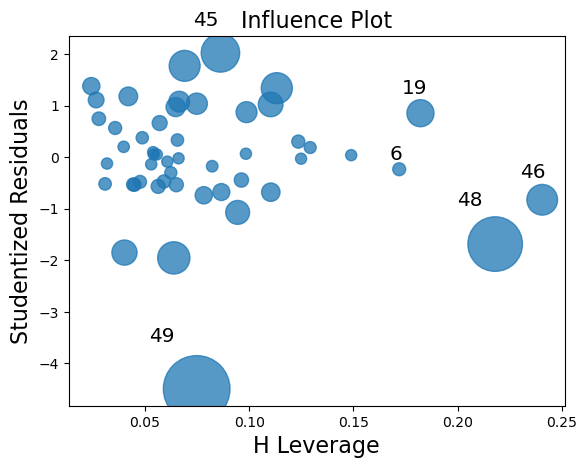

In [27]:
influence_plot(model)
plt.show()

In [28]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [29]:
# dropping 49 & 48 rows due to high influence

startup2=startup.drop(startup.index[[49, 48]],axis=0).reset_index(drop=True)
startup2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
model1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        07:13:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df2={'Prep_Models':['Model','Model1'],'Rsquared':[model.rsquared, model1.rsquared]}
table=pd.DataFrame(df2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model1,0.950746


In [32]:
new_statup=pd.DataFrame({'RD_Spend':100000,"Administration":75000,"Marketing_Spend":90000},index=[0])
new_statup

,RD_Spend,Administration,Marketing_Spend
0,100000,75000,90000


In [33]:
model1.predict(new_statup)

0    131133.026184
dtype: float64

In [34]:
prediction_y=model1.predict(startup2)
prediction_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
dtype: float64

# Problem: ToyotaCorolla

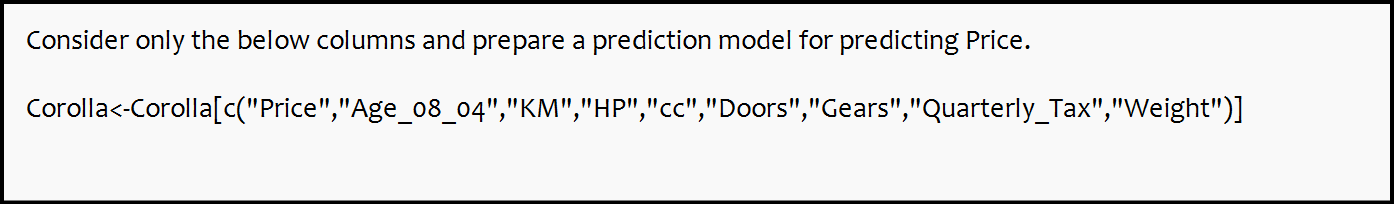

In [35]:
toycorr = pd.read_csv("Toyoto_Corrola.csv")

In [36]:
toycorr.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [37]:
toycorr.shape

(1436, 10)

In [38]:
toycorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [39]:
toycorr.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [40]:
toycorr_model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=toycorr).fit()

In [41]:
toycorr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:13:18   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     1.10e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
toycorr_model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [43]:
print(toycorr_model.tvalues, '\n', toycorr_model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [44]:
(toycorr_model.rsquared,toycorr_model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Simple Linear Regression Models

In [45]:
ml_Age=smf.ols('Price~Age_08_04',data=toycorr).fit()
ml_KM=smf.ols('Price~KM',data=toycorr).fit()
ml_HP=smf.ols('Price~HP',data=toycorr).fit()
ml_Cylinders=smf.ols('Price~Cylinders',data=toycorr).fit()
ml_Gears=smf.ols('Price~Gears',data=toycorr).fit()
ml_Weight=smf.ols('Price~Weight',data=toycorr).fit()

In [46]:
print(ml_Age.rsquared_adj)
print(ml_KM.rsquared_adj)
print(ml_HP.rsquared_adj)
print(ml_Cylinders.rsquared_adj)
print(ml_Gears.rsquared_adj)
print(ml_Weight.rsquared_adj)

0.7682494010072765
0.3243837764559704
0.09859043279951507
-2.220446049250313e-16
0.0032875236310959677
0.33732884529812746


In [47]:
toycorr.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [48]:
rsq_Age = smf.ols('Price~KM+HP+Doors+Cylinders+Gears+Weight',data=toycorr).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('Price~Age_08_04+HP+Doors+Cylinders+Gears+Weight',data=toycorr).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('Price~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=toycorr).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_Doors = smf.ols('Price~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=toycorr).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Cylinders = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=toycorr).fit().rsquared  
vif_Cylinders = 1/(1-rsq_Cylinders)

rsq_Gears = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=toycorr).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_WT = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears',data=toycorr).fit().rsquared  
vif_WT = 1/(1-rsq_WT)

d1 = {'Variables':['Age', 'KM', 'HP','Doors','Cylinders','Gears', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Doors,vif_Cylinders,vif_Gears,vif_WT]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,2.883147
1,KM,6.117287
2,HP,6.734722
3,Doors,7.288461
4,Cylinders,7.288760
5,Gears,7.238427
6,Weight,5.388709


## Residual Analysis

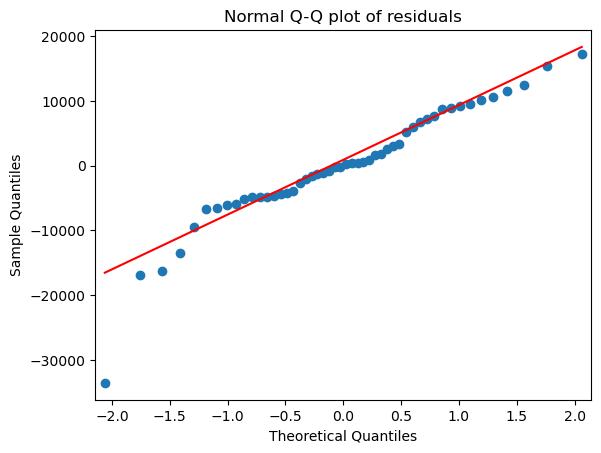

In [49]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [50]:
list(np.where(toycorr_model.resid>10000))

[array([], dtype=int64)]

## Residual Plot for Homoscedasticity

In [51]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

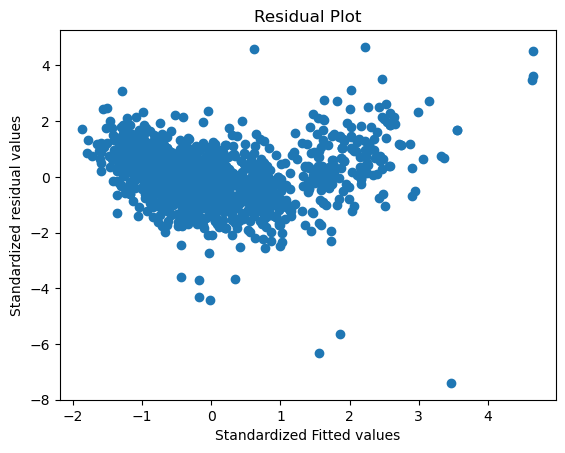

In [52]:
plt.scatter(get_standardized_values(toycorr_model.fittedvalues),
            get_standardized_values(toycorr_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [53]:
model_influence = toycorr_model.get_influence()
(c, _) = model_influence.cooks_distance

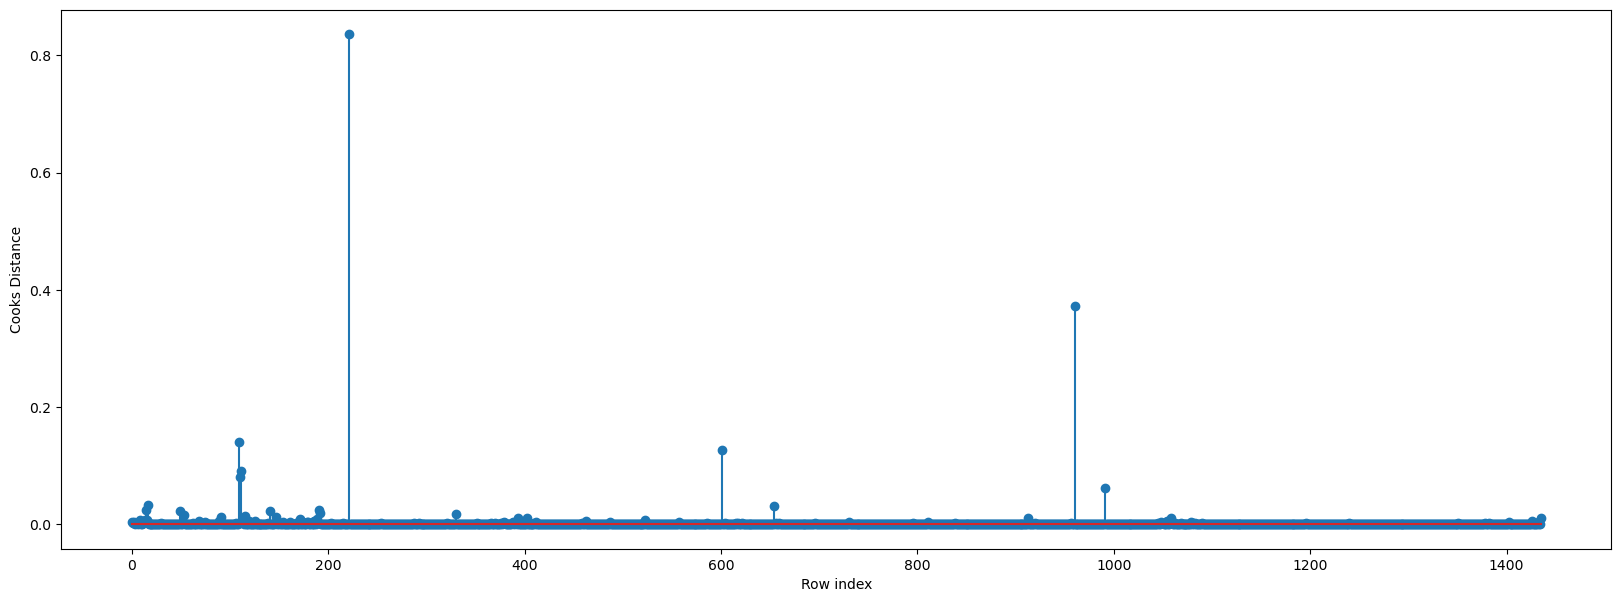

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toycorr)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c),np.max(c))

(221, 0.8359007508851619)

<Figure size 6000x3000 with 0 Axes>

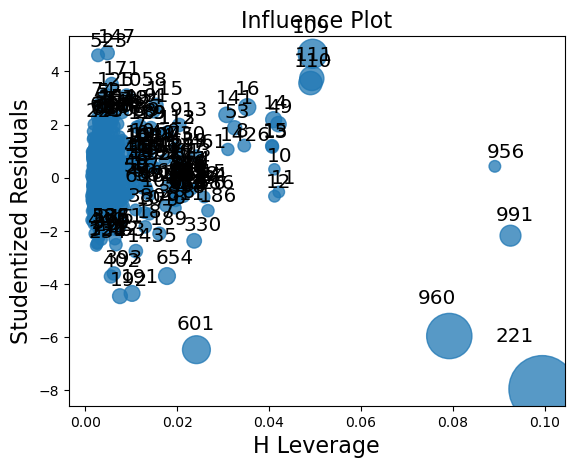

In [56]:
fig = plt.figure(figsize=(60, 30))
influence_plot(toycorr_model)
plt.show()

In [57]:
k = toycorr.shape[1]
n = toycorr.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [58]:
toycorr1=toycorr.drop(toycorr.index[221],axis=0).reset_index()

In [59]:
toycorr_model1 = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=toycorr1).fit()

In [60]:
toycorr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:13:21   Log-Likelihood:                -12341.
No. Observations:                1435   AIC:                         2.470e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -537.7493     77.221     -6.964      0.000    -689.228    -386.270
Age_08_04   -119.1448      2.590    -45.996      0.000    -124.226    -114.064
KM            -0.0207      0.001    -17.442      0.000      -0.023      -0.018
HP            28.1812      2.560     11.009      0.000      23.160      33.202
Doors        -29.6227     39.230     -0.755      0.450    -106.577      47.331
Cylinders  -2150.9972    308.885     -6.964      0.000   -2756.914   -1545.081
Gears        594.7431    193.282      3.077      0.002     215.596     973.890
Weight        20.7316      0.854     24.265      0.000      19.056      22.408
==============================================================================
Omnibus:                      156.861   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.802
Skew:                          -0.288   Prob(JB):                    3.48e-212
Kurtosis:                       6.994   Cond. No.                     3.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
(toycorr_model.rsquared*100,toycorr_model1.rsquared*100)
#slight increse in models rsquared value

(86.28024511073656, 86.85941460420766)

In [62]:
pred_y = toycorr_model1.predict(toycorr1)

In [63]:
pred_y

0       16719.112208
1       16182.099834
2       16709.124629
3       16340.694638
4       16164.359825
            ...     
1430     8770.472355
1431     8237.672247
1432     8397.872643
1433     8519.086822
1434    10823.778290
Length: 1435, dtype: float64

In [64]:
model_acc={'Prep_Models':['Model','Final_Model'],'Rsquared':[toycorr_model.rsquared*100,toycorr_model1.rsquared*100]}
table=pd.DataFrame(model_acc)
table

,Prep_Models,Rsquared
0,Model,86.280245
1,Final_Model,86.859415
